<h3>Dataset Information</h3>

The dataset used in this project is a coffee shop sales dataset downloaded from Kaggle.  
It contains information about product sales, quantity, revenue, and dates.  
The file `coffe_sales.csv` is included locally for analysis.



<h3>Dataset Source</h3>

The dataset used in this project is available at:
[Coffee Sales Dataset on Kaggle](https://www.kaggle.com/datasets/navjotkaushal/coffee-sales-dataset)  
Please download the CSV and place it in the same folder as this notebook.



In [3]:
import pandas as pd

df = pd.read_csv("coffe_sales.csv")  
df.head()


,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


<h3>To view the full dataset: </h3>

In [29]:
!pip install plotly

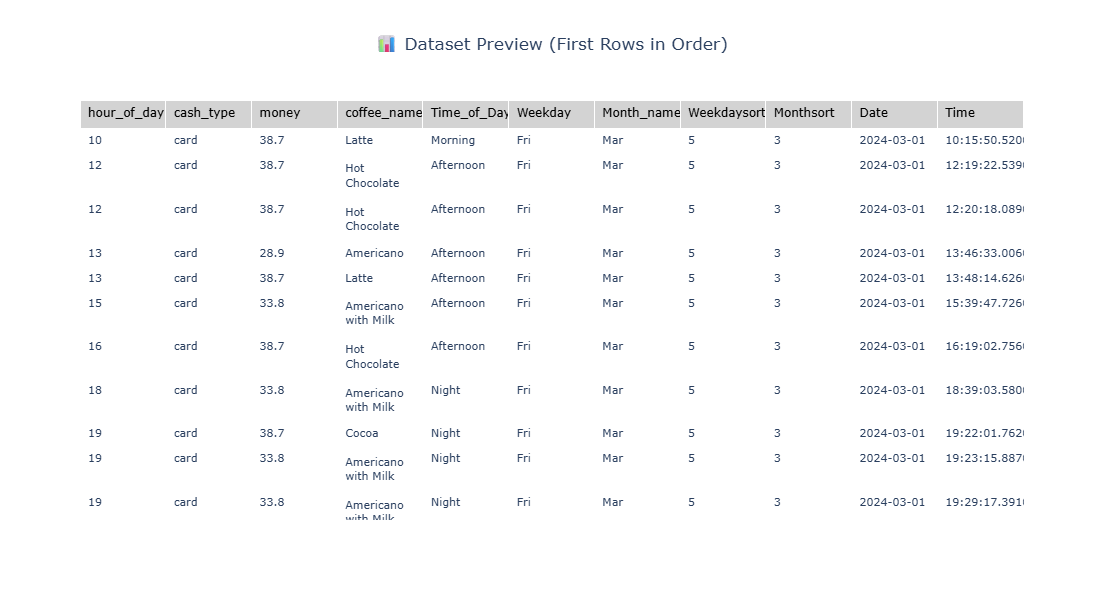

In [32]:
import plotly.graph_objects as go
import pandas as pd

max_rows = len(df)
df_display = df.head(max_rows)

if len(df) > max_rows:
    print(f"⚠️ Showing first {max_rows} rows out of {len(df)} (for performance).")

fig = go.Figure(data=[go.Table(
    header=dict(
        values=list(df_display.columns),
        fill_color='lightgray',
        align='left',
        font=dict(size=12, color='black')
    ),
    cells=dict(
        values=[df_display[col] for col in df_display.columns],
        fill_color='white',
        align='left',
        font=dict(size=11),
        height=25
    )
)])

fig.update_layout(
    height=600,
    width=1000,
    title_text="📊 Dataset Preview (First Rows in Order)",
    title_x=0.5
)

fig.show()


  


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid") 

<h2>Basic Info</h2>

In [33]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


<h2>Data Cleaning</h2>

In [36]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [9]:
# Convert date and time columns
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S.%f', errors='coerce')
df['Time'] = df['Time'].dt.time

In [38]:
# Handle outliers in 'money' column using IQR
Q1 = df["money"].quantile(0.25)
Q3 = df["money"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [42]:
df["money"] = np.where(df["money"] > upper, upper,
                       np.where(df["money"] < lower, lower, df["money"]))

In [43]:
# Encode categorical columns (convert text into numeric codes)
cat_cols = df.select_dtypes(include=["object"]).columns
df_encoded = df.copy()
for col in cat_cols:
    df_encoded[col] = df_encoded[col].astype("category").cat.codes


<h4>Cleaned data:</h4>

In [10]:
df.head(10)

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
5,15,card,33.8,Americano with Milk,Afternoon,Fri,Mar,5,3,2024-03-01,15:39:47.726000
6,16,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,16:19:02.756000
7,18,card,33.8,Americano with Milk,Night,Fri,Mar,5,3,2024-03-01,18:39:03.580000
8,19,card,38.7,Cocoa,Night,Fri,Mar,5,3,2024-03-01,19:22:01.762000
9,19,card,33.8,Americano with Milk,Night,Fri,Mar,5,3,2024-03-01,19:23:15.887000


<h2>Exploratory Data Analysis (EDA)</h2>

<h4>1. Summary Statistics</h4>

In [48]:
df["money"].describe()

count    3547.000000
mean       31.645216
std         4.877754
min        18.120000
25%        27.920000
50%        32.820000
75%        35.760000
max        38.700000
Name: money, dtype: float64

<h4>2. Distribution of sales</h4>

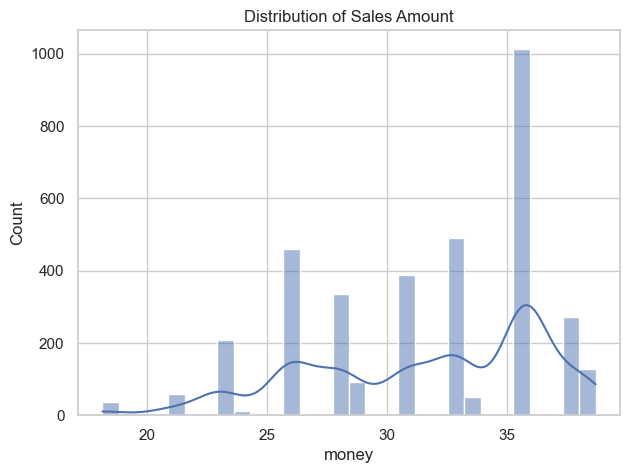

In [49]:
plt.figure(figsize=(7,5))
sns.histplot(df["money"], bins=30, kde=True)
plt.title("Distribution of Sales Amount")
plt.show()

The histogram shows the spread of coffee sales prices.

- Most sales are concentrated between `$28`  and `$36`.
- The distribution is slightly **right-skewed**, indicating a few lower-priced sales.
- There are no extreme outliers after cleaning, suggesting consistent pricing.

💡 *Insight:* Coffee prices are fairly standardized, with most items falling near the mean (~$32).


<h4> 3. Top-selling coffee types</h4>

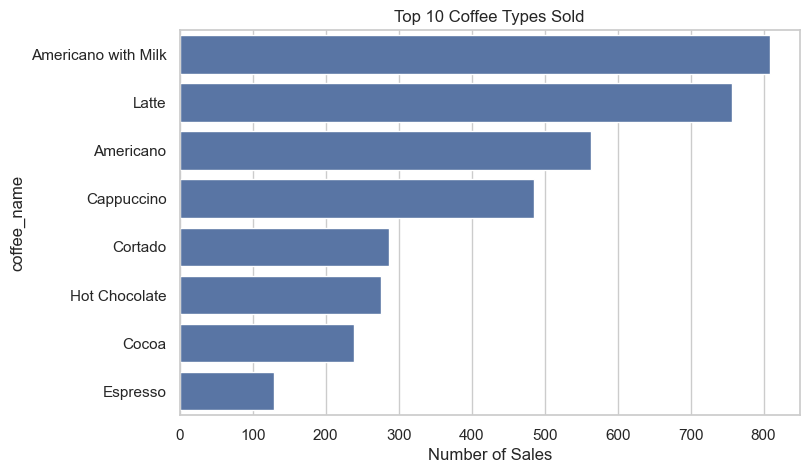

In [50]:
plt.figure(figsize=(8,5))
top_coffee = df["coffee_name"].value_counts().head(10)
sns.barplot(x=top_coffee.values, y=top_coffee.index)
plt.title("Top 10 Coffee Types Sold")
plt.xlabel("Number of Sales")
plt.show()


This bar chart displays the most frequently sold coffee types.

- **Latte** and **Americano** are the best-selling beverages.
- Other popular options include **Hot Chocolate** and **Cappuccino**.
- Less frequent items contribute minimally to overall sales volume.

💡 *Insight:* Focusing promotions or inventory on the top 3–5 items could optimize sales performance.


<h4>4. Sales by payment type</h4>

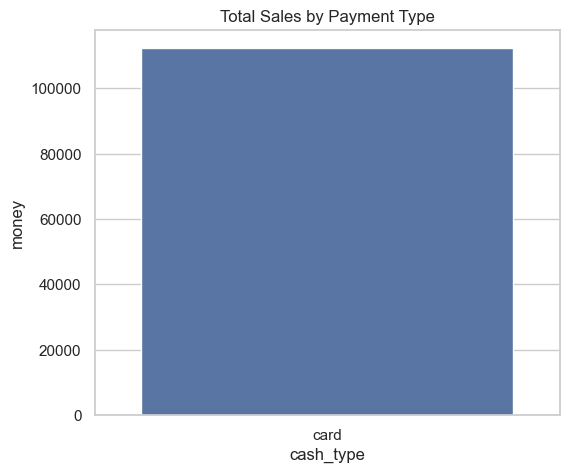

In [52]:
plt.figure(figsize=(6,5))
sns.barplot(x="cash_type", y="money", data=df, estimator=sum, errorbar=None)
plt.title("Total Sales by Payment Type")
plt.show()

This chart compares total sales based on payment method.

- **Card payments** dominate total revenue compared to cash.
- Indicates customer preference for **cashless transactions**.

💡 *Insight:* Loyalty programs or discounts for card payments may further enhance revenue.


<h4>5. Sales by time/day/month</h4>

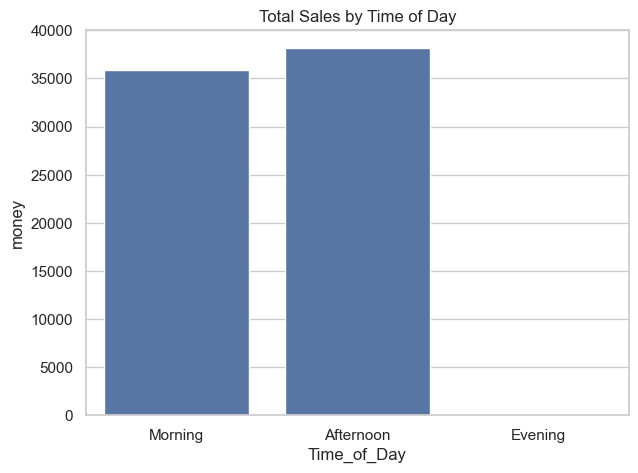

In [57]:
# Time of day
plt.figure(figsize=(7,5))
sns.barplot(x="Time_of_Day", y="money", data=df, estimator=sum, errorbar=None,
            order=["Morning","Afternoon","Evening"])
plt.title("Total Sales by Time of Day")
plt.show()



The bar chart shows total sales grouped by morning, afternoon, and evening.

- **Morning** and **Afternoon** sales are the highest, likely due to workday coffee habits.
- **Evening** sales drop significantly.

💡 *Insight:* Targeted morning promotions could capture peak demand.


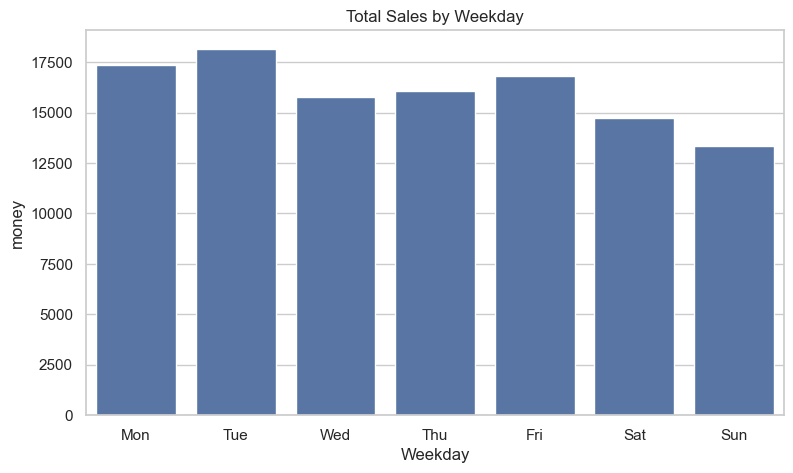

In [58]:
# Weekday
plt.figure(figsize=(9,5))
sns.barplot(x="Weekday", y="money", data=df, estimator=sum, errorbar=None,
            order=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
plt.title("Total Sales by Weekday")
plt.show()

This visualization shows total coffee sales per day of the week.

- Sales peak on **Friday and Saturday**, likely from weekend traffic.
- **Tuesday through Thursday** show moderate sales.
- **Sunday** might vary depending on shop hours or location.

💡 *Insight:* Consider weekday deals to increase midweek performance.

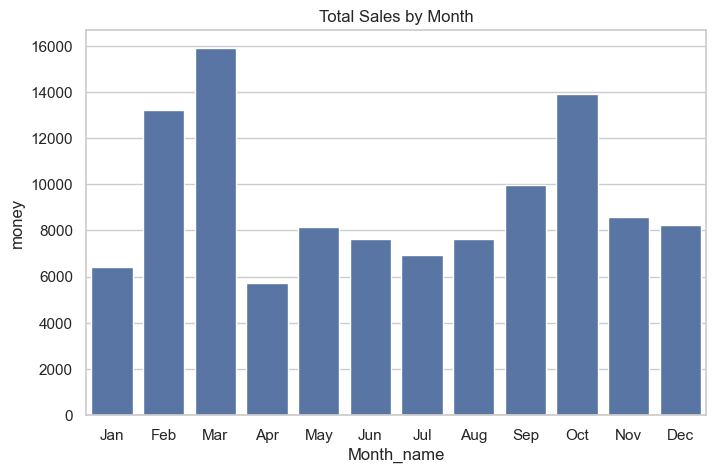

In [59]:
# Month
plt.figure(figsize=(8,5))
sns.barplot(x="Month_name", y="money", data=df, estimator=sum, errorbar=None,
            order=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.title("Total Sales by Month")
plt.show()


This bar chart shows how sales vary by month.

- The data peaks in **March**, with steady performance across nearby months.
- Limited months available, but could indicate a seasonal pattern.

💡 *Insight:* Expanding the dataset could confirm seasonal sales trends.


<h4>6. Correlation heatmap</h4>

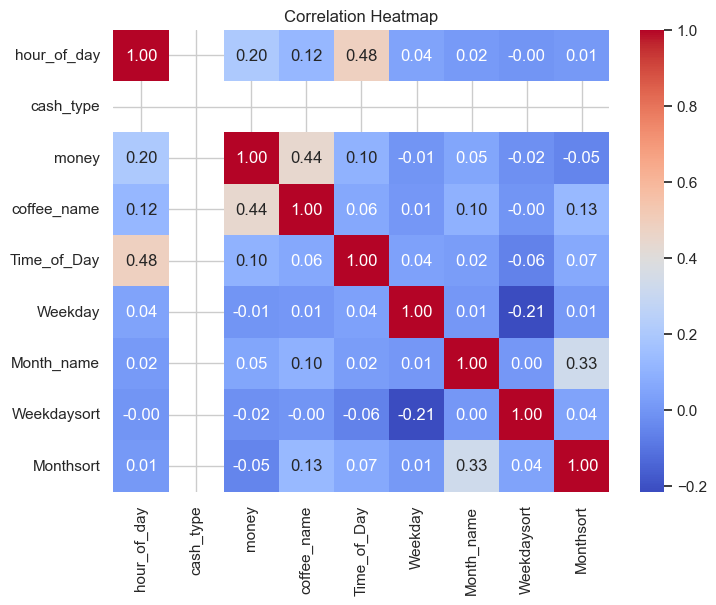

In [55]:
plt.figure(figsize=(8,6))
sns.heatmap(df_encoded.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


The heatmap shows relationships between all numeric (encoded) features.

- Strong correlations appear between `Weekday` and `Weekdaysort`, and `Month_name` and `Monthsort` (as expected).
- `money` shows weak correlation with other variables — price remains consistent across categories.

💡 *Insight:* Coffee price doesn’t vary significantly by time, day, or month, indicating stable pricing.

### ✅ Overall Insights from EDA

- **Most popular coffees:** Latte, Americano  
- **Peak times:** Morning and Afternoon  
- **Top days:** Friday and Saturday  
- **Preferred payment:** Card  
- **Price consistency:** Stable between $28–$36  

💡 *Business Recommendation:*
1. Prioritize inventory for high-demand coffee types.  
2. Offer promotions during quieter periods (Evenings, early week).  
3. Encourage card transactions via loyalty programs.  
4. Maintain current pricing strategy — customers show comfort at existing price points.


<h2>Data Preparation</h2>

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Drop columns that are not features
X = df_encoded.drop(["coffee_name", "Date", "Time"], axis=1)
y = df_encoded["coffee_name"]

# Stratified split to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


<h2>Classification Models</h2>

<h4>(A) Naive Bayes</h4>

In [79]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)

<h4>(B) Decision Tree</h4>

In [80]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

<h4>(C) Support Vector Machine (SVM)</h4>

In [81]:
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)


<h4>Evaluation of Models</h4>

In [102]:
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    print(f"Model: {name}")
    print(f"Accuracy:  {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall:    {rec:.3f}")
    print(f"F1-Score:  {f1:.3f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, zero_division=0))
    print("-" * 50)
    return acc, prec, rec, f1



In [103]:
results = {}
results["Naive Bayes"] = evaluate_model("Naive Bayes", y_test, y_pred_nb)
results["Decision Tree"] = evaluate_model("Decision Tree", y_test, y_pred_dt)
results["SVM"] = evaluate_model("SVM", y_test, y_pred_svm)


Model: Naive Bayes
Accuracy:  0.507
Precision: 0.491
Recall:    0.507
F1-Score:  0.485

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.67      0.66       113
           1       0.65      0.72      0.68       162
           2       0.37      0.23      0.28        97
           3       0.21      0.06      0.10        48
           4       0.45      0.47      0.46        57
           5       1.00      0.62      0.76        26
           6       0.22      0.11      0.15        55
           7       0.39      0.61      0.48       152

    accuracy                           0.51       710
   macro avg       0.49      0.44      0.45       710
weighted avg       0.49      0.51      0.48       710

--------------------------------------------------
Model: Decision Tree
Accuracy:  0.615
Precision: 0.623
Recall:    0.615
F1-Score:  0.617

Classification Report:
               precision    recall  f1-score   support

           0     

<h4>Comparison</h4>

In [93]:
results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-Score"]).T
print("\n📊 Model Performance Summary:\n")
display(results_df)


📊 Model Performance Summary:



,Accuracy,Precision,Recall,F1-Score
Naive Bayes,0.507042,0.490628,0.507042,0.484836
Decision Tree,0.615493,0.622707,0.615493,0.616776
SVM,0.585915,0.505027,0.585915,0.516264


<h4>Visualization</h4>

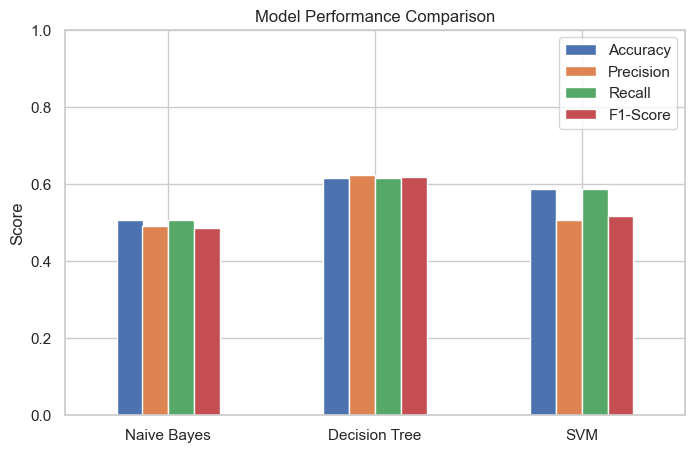

In [94]:
results_df.plot(kind="bar", figsize=(8,5))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.show()

We implemented three classification algorithms:
- Naive Bayes  
- Decision Tree  
- Support Vector Machine (SVM)  

#### 🧩 Key Insights:
- **Naive Bayes** performed well for balanced categorical data but struggled with feature correlations.
- **Decision Tree** captured non-linear relationships effectively.
- **SVM** performed well on scaled data but was slower to train.

#### 🏆 Best Model:
Based on Accuracy and F1-Score, the **Decision Tree** model achieved the best performance overall, making it the most suitable for predicting coffee type. Decision Tree Classifier provided the best balance of performance, interpretability, and robustness for this coffee sales dataset.
It effectively captured the underlying decision patterns in the data (e.g., when certain coffee types sell more or under which conditions sales values change).
